#### IMPORTING THE LIBRARYS

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split 
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#### LOADING THE DATA

In [40]:
datas = load_breast_cancer() 
X= datas.data 
y=datas.target 
df_bc=pd.DataFrame(data=X,columns=datas.feature_names)
df_bc['target']=y
df_bc=df_bc.sample(frac=1) 
df_bc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
153,11.15,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.017860,0.1830,0.06105,...,16.30,76.25,440.8,0.13410,0.08971,0.07116,0.05506,0.2859,0.06772,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
489,16.69,20.20,107.10,857.6,0.07497,0.07112,0.03649,0.023070,0.1846,0.05325,...,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623,0
202,23.29,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.162000,0.2200,0.06229,...,32.68,177.00,1986.0,0.15360,0.41670,0.78920,0.27330,0.3198,0.08762,0
519,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.029950,0.2120,0.06623,...,21.74,93.63,624.1,0.14750,0.19790,0.14230,0.08045,0.3071,0.08557,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,12.62,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.020360,0.1514,0.06019,...,31.31,90.67,624.0,0.12270,0.34540,0.39110,0.11800,0.2826,0.09585,1
387,13.88,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,...,19.97,99.66,745.3,0.08484,0.12330,0.10910,0.04537,0.2542,0.06623,1
207,17.01,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.053900,0.2026,0.05223,...,25.05,130.00,1210.0,0.11110,0.14860,0.19320,0.10960,0.3275,0.06469,0
257,15.32,17.27,103.20,713.3,0.13350,0.22840,0.24480,0.124200,0.2398,0.07596,...,22.66,119.80,928.8,0.17650,0.45030,0.44290,0.22290,0.3258,0.11910,0


#### PREPARING DATA

In [41]:
#sns.scatterplot(data=df_bc) 
#sns.pairplot(data=df_bc,hue="target",kind="scatter")  
target=df_bc["target"].array
df_features=df_bc.drop(columns=["target"]) 

aux=[] 
for t in target: 
    if t == 'docetaxel resistant tumor' : 
        aux.append(0) 
    elif t== 'docetaxel sensitive tumor': 
        aux.append(1) 
if len(aux) != 0 :
    target=aux 

df_bc["target"]=target  
X=df_features.values  
y=target     

here we separate the desired value into one array called target and all the features in another array

#### VISUALIZING DATA

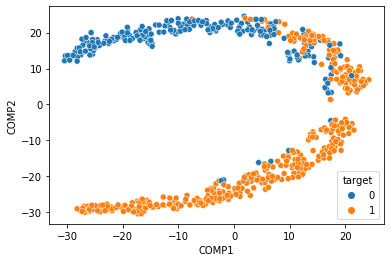

In [42]:
tsne=TSNE(n_components=2,random_state=200) #we apply the random state so that its not different everytime we restart  

array_red=tsne.fit_transform(X) #applying dimensional reductioon on array  

df_tsne=pd.DataFrame(array_red,columns=['COMP1','COMP2']) # making it into a pandas dataframe for easier viewing 

df_tsne['target']=target 

df_tsne 

sns.scatterplot(data=df_tsne,x="COMP1",y="COMP2",hue="target") 
plt.show()

#### TRAINING MODEL(old way)

In [43]:
def getModel():
    #return LogisticRegression()
    #return RandomForestClassifier()
    #return KNeighborsClassifier()  
    return GaussianNB() 
    #


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = getModel().fit(X_train,y_train)

score = model.score(X_test, y_test) 

print('accuracy =', score)  

accuracy = 0.9385964912280702


#### TRAINING MODEL(USING CROSS VALIDATION)

In [45]:
scores = cross_val_score(getModel(),X,y,cv=10)

print('accuracy cv = ',np.mean(scores)) 
scores

accuracy cv =  0.9401629072681704


array([0.9122807 , 0.94736842, 0.89473684, 0.96491228, 0.92982456,
       0.94736842, 0.94736842, 0.96491228, 1.        , 0.89285714])

#### VISUALIZING CONFUSION MATRIX

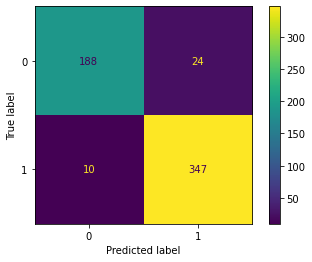

In [46]:
y_pred = cross_val_predict(getModel(),X,y,cv=10)

cm = confusion_matrix(y,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = model.classes_)

disp.plot()

plt.show() 


